# 1.GOOGLE COLABORATORY DOSYASI  
# 2.GEREKLİ KÜTÜPHANELERİN EKLENMESİ 


https://www.kaggle.com/datasets/mirichoi0218/insurance

Content
Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

In [1]:
# BASE
import joblib 
import numpy as np
import pandas as pd  
import seaborn as sns  
import missingno as msno  
import matplotlib.pyplot as plt  

# DATA PREPROCESSING
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler  
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import OneHotEncoder
 
# MODELING

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,AdaBoostClassifier  
from sklearn.tree import DecisionTreeClassifier 
from lightgbm import LGBMClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate,GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# MODEL TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:
pd.set_option('display.max_columns',None) 
pd.set_option('display.width',500)

In [ ]:
#Load medical cost data.
df = pd.read_csv("insurance.csv")

## 3. Keşifsel Veri Analizi Yapılması

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# üstteki işlemlerimi fonksiyonel hale getirdim hepsini bir arada görmek istediğim için
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Head #####################
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
##################### Tail #####################
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629

A) Kategorik ve Numerik değişkenleri gözlemleyelim

In [ ]:
# kategorik değişkenleri bulduk 
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"] ] 

cat_cols

['sex', 'smoker', 'region']

In [ ]:
# tipi int veya float olup sınır sayısı küçük olanları alalım (numerik kategorik değişken)
num_but_car = [col for col in  df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]  
num_but_car

['children']

In [ ]:
# object tipinde kategorik değişken var ama sayısı fazla olabilir (kalibresi yüksek veriler ölçülemeyecek kadar fazla sınıfı var) 


cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["int","float64"]] 
cat_but_car

['bmi', 'charges']

In [ ]:
# bunun içerisindeki numerik değişkenleri seçme 

num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]] 
num_cols

['age', 'bmi', 'children', 'charges']

kategorik ve numeriklerimi fonksiyonlaştırayım

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
5%         18.000000
10%        19.000000
20%        24.000000
30%        29.000000
40%        34.000000
50%        39.000000
60%        44.000000
70%        49.000000
80%        54.000000
90%        59.000000
max        64.000000
Name: age, dtype: float64


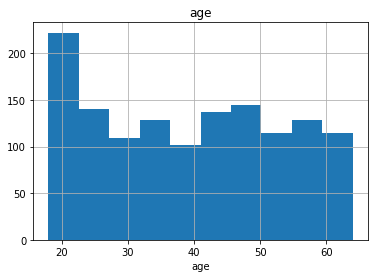

In [ ]:
def num_summary(dataframe,numerical_col, plot = False):  
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90] 
    print(dataframe[numerical_col].describe(quantiles).T) 
    
    if plot: 
        dataframe[numerical_col].hist() 
        plt.xlabel(numerical_col)
        plt.title(numerical_col) 
        plt.show(block=True) 

num_summary(df,"age",plot=True)

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
5%         18.000000
10%        19.000000
20%        24.000000
30%        29.000000
40%        34.000000
50%        39.000000
60%        44.000000
70%        49.000000
80%        54.000000
90%        59.000000
max        64.000000
Name: age, dtype: float64


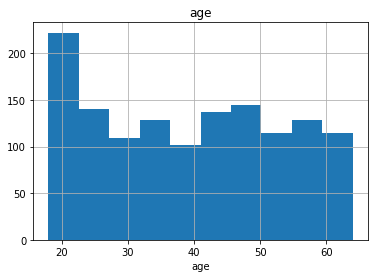

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
5%         21.256000
10%        22.990000
20%        25.326000
30%        27.360000
40%        28.797000
50%        30.400000
60%        32.032000
70%        33.660000
80%        35.860000
90%        38.619500
max        53.130000
Name: bmi, dtype: float64


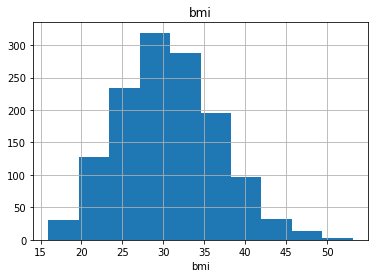

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         1.000000
60%         1.000000
70%         2.000000
80%         2.000000
90%         3.000000
max         5.000000
Name: children, dtype: float64


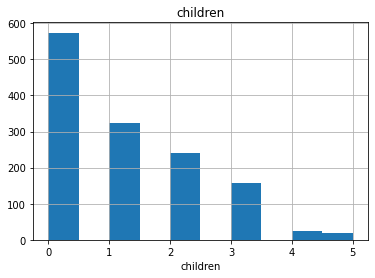

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
5%        1757.753400
10%       2346.533615
20%       3991.575720
30%       5484.846770
40%       7369.052730
50%       9382.033000
60%      11399.857160
70%      13767.875345
80%      20260.626406
90%      34831.719700
max      63770.428010
Name: charges, dtype: float64


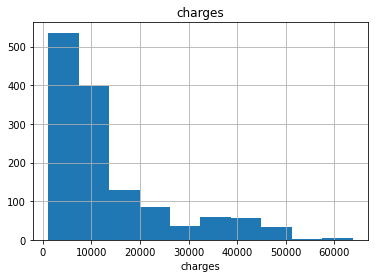

In [ ]:
# tek tek yazıyorum fakat bunun fazla olduğunu düşünelim o zaman şu işlemi uygularız 

for col in num_cols: 
    num_summary(df,col,plot=True)

        sex      Ratio
male    676  50.523169
female  662  49.476831
#########################################################


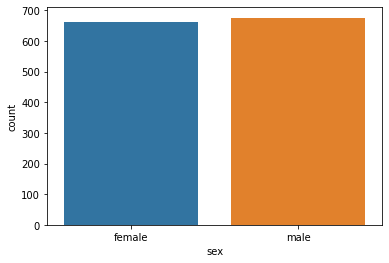

     smoker      Ratio
no     1064  79.521674
yes     274  20.478326
#########################################################


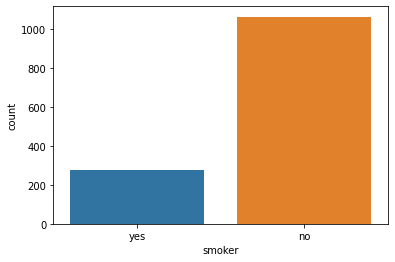

           region      Ratio
southeast     364  27.204783
southwest     325  24.289985
northwest     325  24.289985
northeast     324  24.215247
#########################################################


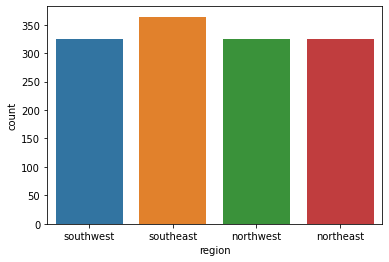

In [ ]:
def cat_summary(dataframe , col_name, plot = False): 
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(), 
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)})) 

    print("#########################################################")    
    if plot: 
        sns.countplot(x=dataframe[col_name],data=dataframe) 
        plt.show(block=True)
for col in cat_cols: 
    cat_summary(df,col, plot= True)

Fonksiyonlaştıralım



```
# Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.
    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri
    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı
```



In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
   
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1338
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 1


Hedef Değişkenin Kategorik Değişkenler ile Analizi

In [ ]:
# cinsiyete göre masraflar ortalaması
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [ ]:
# target değişkenimize göre analizini yapalım
def target_summary_with_cat(dataframe, target, categorical_col): 
    print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col)[target].mean()}))

In [ ]:
# hepsine bakalım
for col in cat_cols: 
    target_summary_with_cat(df,"charges",col)

         TARGET_MEAN
sex                 
female  12569.578844
male    13956.751178
         TARGET_MEAN
smoker              
no       8434.268298
yes     32050.231832
            TARGET_MEAN
region                 
northeast  13406.384516
northwest  12417.575374
southeast  14735.411438
southwest  12346.937377
           TARGET_MEAN
children              
0         12365.975602
1         12731.171832
2         15073.563734
3         15355.318367
4         13850.656311
5          8786.035247


Hedef Değişkenin numerik Değişkenler ile Analizi

In [ ]:
# üsttekini şöyle de kullanabiliriz ; 
df.groupby("charges").agg({"age":"mean"})

,age
charges,
1121.87390,18.0
1131.50660,18.0
1135.94070,18.0
1136.39940,18.0
1137.01100,18.0
...,...
55135.40209,33.0
58571.07448,31.0
60021.39897,52.0


In [ ]:
def target_summary_with_num(dataframe, target, numerical_col): 
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")

In [ ]:
for col in num_cols: 
    target_summary_with_num(df,"charges",col)

              age
charges          
1121.87390   18.0
1131.50660   18.0
1135.94070   18.0
1136.39940   18.0
1137.01100   18.0
...           ...
55135.40209  33.0
58571.07448  31.0
60021.39897  52.0
62592.87309  45.0
63770.42801  54.0

[1337 rows x 1 columns]


                bmi
charges            
1121.87390   23.210
1131.50660   30.140
1135.94070   33.330
1136.39940   33.660
1137.01100   34.100
...             ...
55135.40209  35.530
58571.07448  38.095
60021.39897  34.485
62592.87309  30.360
63770.42801  47.410

[1337 rows x 1 columns]


                 charges
charges                 
1121.87390    1121.87390
1131.50660    1131.50660
1135.94070    1135.94070
1136.39940    1136.39940
1137.01100    1137.01100
...                  ...
55135.40209  55135.40209
58571.07448  58571.07448
60021.39897  60021.39897
62592.87309  62592.87309
63770.42801  63770.42801

[1337 rows x 1 columns]




In [ ]:
def plot_hist(variable):
    plt.figure(figsize=(12,5))  
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable + " distribution with hist")
    sns.distplot(df[variable], bins=50, color='b')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


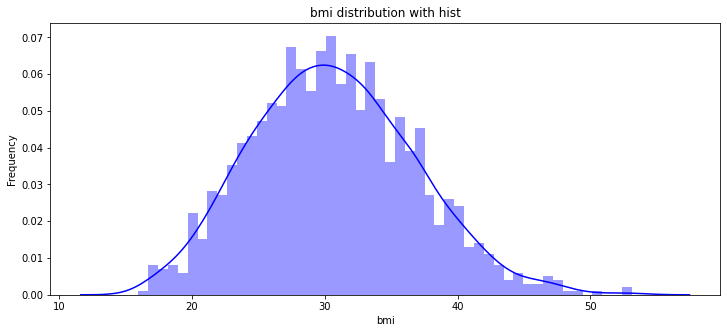

In [ ]:
plot_hist("bmi")

“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

In [ ]:
def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    # get feature
    var= df[variable]
    # count number of categorical variable(value/sample)
    varValue= var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}". format(variable,varValue))

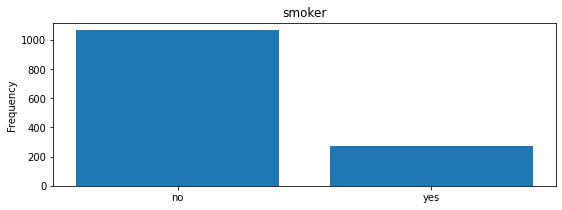

smoker: 
 no     1064
yes     274
Name: smoker, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


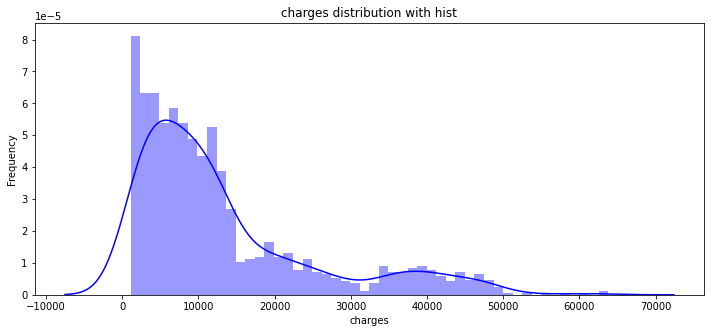

In [ ]:
bar_plot("smoker")
plot_hist("charges")

In [ ]:
df[["smoker","charges"]].groupby(["smoker"], as_index= False).mean().sort_values(by="charges", ascending=False)

,smoker,charges
1,yes,32050.231832
0,no,8434.268298


**LABEL ENCODING**

In [ ]:
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

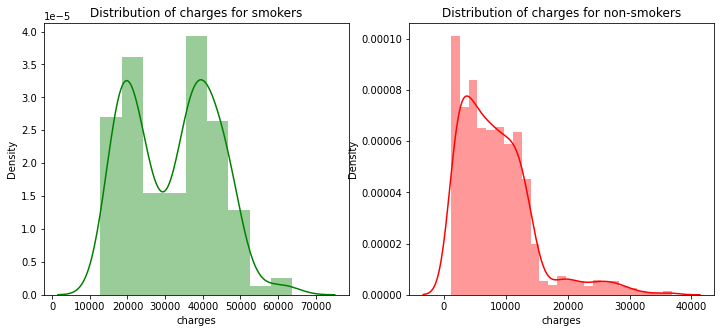

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='green',ax=ax)
ax.set_title('Distribution of charges for smokers') 


ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='red',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.

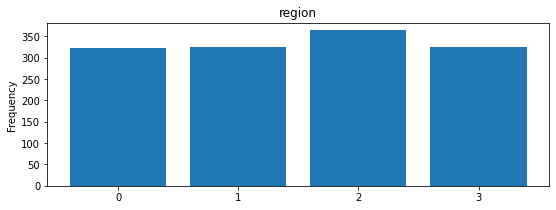

region: 
 2    364
3    325
1    325
0    324
Name: region, dtype: int64


In [ ]:
bar_plot("region")

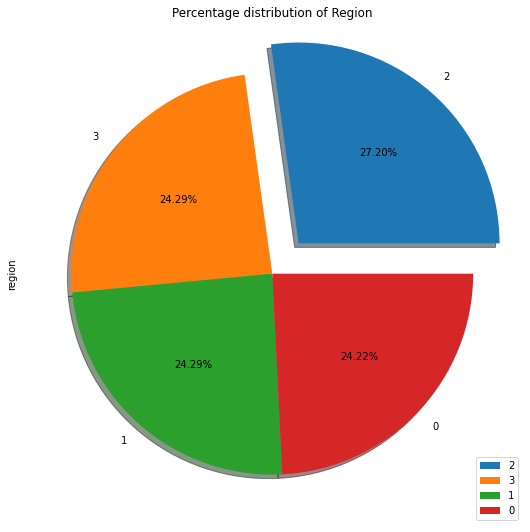

In [ ]:
plt.figure(figsize=(9,9.5))
df['region'].value_counts().plot(kind='pie',explode=[0.2,0,0,0],legend=True,autopct='%.2f%%',shadow=True)
plt.title('Percentage distribution of Region')
plt.show()

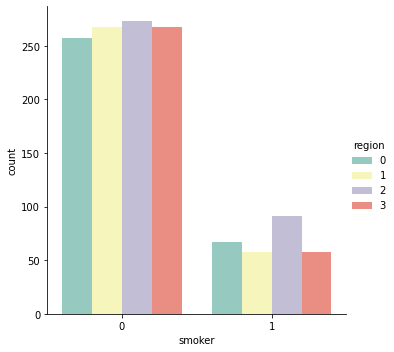

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'region', palette="Set3", data=df)

“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

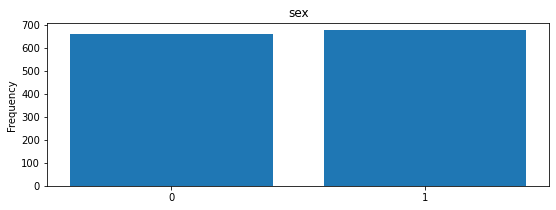

sex: 
 1    676
0    662
Name: sex, dtype: int64


In [ ]:
bar_plot("sex")

In [ ]:
df[["bmi","sex"]].groupby(["sex"], as_index= False).mean().sort_values(by="bmi", ascending=False)

,sex,bmi
1,1,30.943129
0,0,30.377749


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of bmi for men')

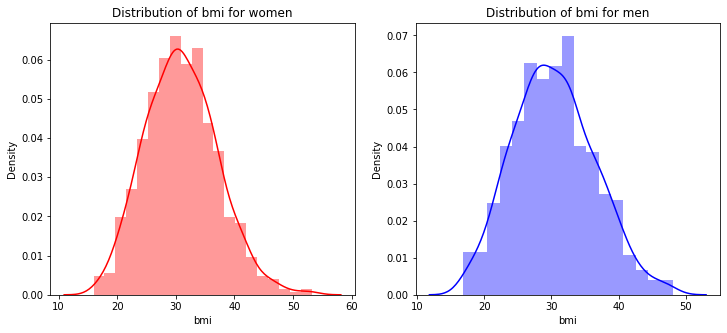

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.sex == 1)]["bmi"],color='red',ax=ax)
ax.set_title('Distribution of bmi for women')

ax=f.add_subplot(122)
sns.distplot(df[(df.sex == 0)]['bmi'],color='blue',ax=ax)
ax.set_title('Distribution of bmi for men')

En çok “children”’a sahip “region”’ı bulunuz.

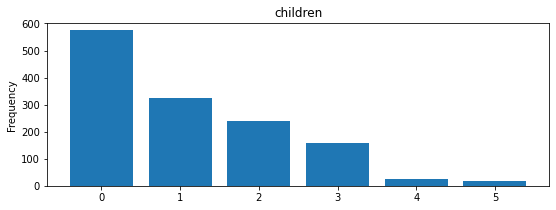

children: 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [ ]:
bar_plot("children")

In [ ]:
# kolerasyon hesaplamak için "corr" fonksiyonu kullanılır ; 

corr = df[num_cols].corr() 
corr

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


In [ ]:
# kolerasyon : değişkenlerin birbiriyle ilişkisini ifade eden bir ölçümdür -1 ile 1 arasındadır 
# 1 : pozitif korelasyon -1 : negatif korelasyon 
# 1 e yaklaştıkça ilişki şiddeti kuvvetli , -1 e yaklaştıkça ilişki şiddeti azdır. 
# 0 civarında ise "kolerasyon yoktur!!!" 

In [ ]:
# ısı haritası oluşturalım ; 

print(df.corr())

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


In [ ]:
import seaborn as sb 
import matplotlib.pyplot as mp

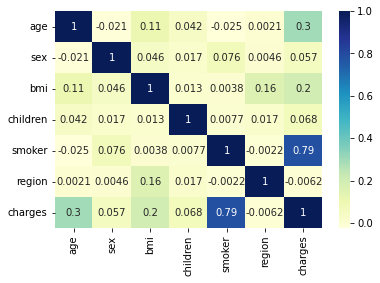

In [ ]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
mp.show()

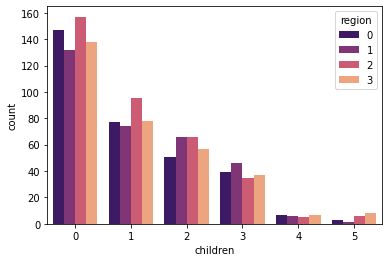

In [ ]:
ax = sns.countplot(x="children",hue="region", data=df, palette="magma")

“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


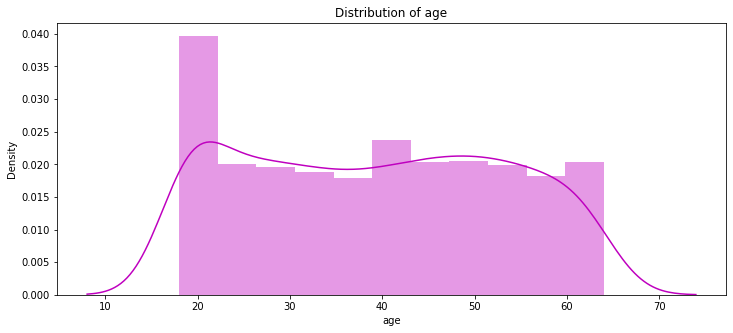

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


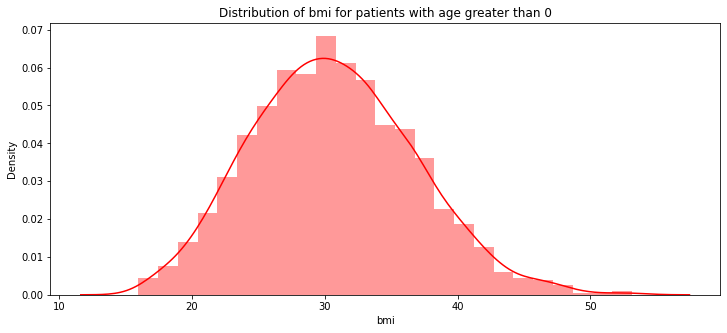

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi for patients with age greater than 0")
ax = sns.distplot(df[(df.age >= 0)]['bmi'], color = 'r')

“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

In [ ]:
data2= df[["children","bmi"]].groupby(["children"], as_index= False).mean().sort_values(by="children", ascending=False)
data2

,children,bmi
5,5,29.605000
4,4,31.391200
3,3,30.684331
2,2,30.978104
1,1,30.623148
0,0,30.550296


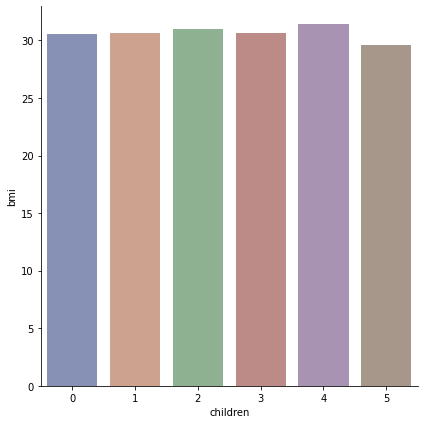

In [ ]:
sns.catplot(data=data2, kind="bar",x="children", y="bmi",ci="sd", palette="dark", alpha=.5, height=6)

“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

Text(0.5, 1.0, 'bmi and charges')

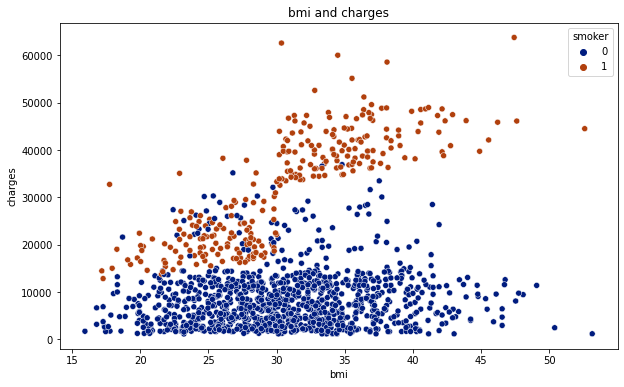

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='dark',hue='smoker')
ax.set_title('bmi and charges')

region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

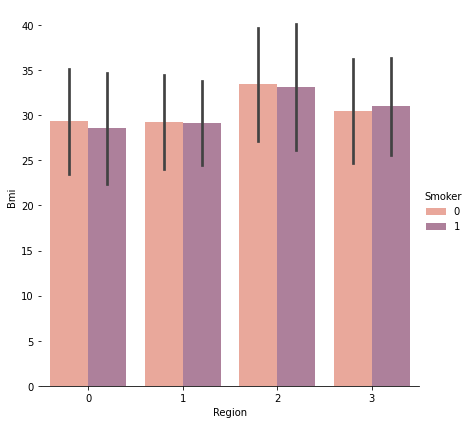

In [ ]:
g = sns.catplot(
    data=df, kind="bar",
    x="region", y="bmi", hue="smoker",
    ci="sd", palette="rocket_r", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Region", "Bmi")
g.legend.set_title("Smoker")

## 4. Veri Ön İşleme Yapılması

B) Outliers değerleri gözlemleyelim

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

“bmi” değişkeninde outlier var mıdır? İnceleyiniz

In [ ]:
outlier_thresholds(df, "bmi")

(13.7, 47.290000000000006)

In [ ]:
outlier_thresholds(df, "age")

(-9.0, 87.0)

In [ ]:
outlier_thresholds(df, "charges")

(-13109.1508975, 34489.350562499996)

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
check_outlier(df, "age") 

False

In [ ]:
check_outlier(df, "bmi")

True

In [ ]:
check_outlier(df, "charges")

True

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
bmi True
charges True


Outliers değerleri silemeyiz belki de gerçekten "charges" yani masrafların az olduğu ücretler olabilir o yüzden silmememiz gerekiyor sadece tespit ettik sonrasında "Standart Scaler" uygulayabiliriz.



One Hot Encoding : 
* sınıflar arası fark yokken varmış gibi olacaktır

* sınıfları değişkenlere dönüştürme

* ilk sınıf drop edilirse problem yaşanmaz

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [ ]:
# get_dummies -> bana bir dataframe söyle ben sadece onları dönüştürecem/diğerleri olduğu gibi kalacak 
pd.get_dummies(df,columns=["sex" , "region", "smoker"]).head()

,age,bmi,children,charges,sex_0,sex_1,region_0,region_1,region_2,region_3,smoker_0,smoker_1
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
# drop_first ü kullanacağız dummi ile birbiri üstüne geçmemesi için 
new_df = pd.get_dummies(df,columns=["sex", "region","smoker"], drop_first=True).head()

In [ ]:
new_df.head()

,age,bmi,children,charges,sex_1,region_1,region_2,region_3,smoker_1
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [ ]:
# eğer ilgili değişkendeki eksik değerlerde gelsin istersek 
new_df= pd.get_dummies(df,columns=["sex","region","smoker"], dummy_na=True).head()

In [ ]:
new_df

,age,bmi,children,charges,sex_0.0,sex_1.0,sex_nan,region_0.0,region_1.0,region_2.0,region_3.0,region_nan,smoker_0.0,smoker_1.0,smoker_nan
0,19,27.900,0,16884.92400,1,0,0,0,0,0,1,0,0,1,0
1,18,33.770,1,1725.55230,0,1,0,0,0,1,0,0,1,0,0
2,28,33.000,3,4449.46200,0,1,0,0,0,1,0,0,1,0,0
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
# tailine de bakmamız lazım aksi halde gözden kaçan nan değerler olabilir 
new_df.tail()

,age,bmi,children,charges,sex_0.0,sex_1.0,sex_nan,region_0.0,region_1.0,region_2.0,region_3.0,region_nan,smoker_0.0,smoker_1.0,smoker_nan
0,19,27.900,0,16884.92400,1,0,0,0,0,0,1,0,0,1,0
1,18,33.770,1,1725.55230,0,1,0,0,0,1,0,0,1,0,0
2,28,33.000,3,4449.46200,0,1,0,0,0,1,0,0,1,0,0
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
#hepsini tek bir adımda yapmak istersek 
new_df = pd.get_dummies(df,columns=["sex","region","smoker"], drop_first=True).head()

In [ ]:
new_df.tail()

,age,bmi,children,charges,sex_1,region_1,region_2,region_3,smoker_1
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


In [ ]:
new_df.head()

,age,bmi,children,charges,sex_1,region_1,region_2,region_3,smoker_1
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0


Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.

**STANDART SCALER** 
* bmi , charges, age i standartlaştırarak normalize hale getiriyoruz

In [ ]:
from sklearn.preprocessing import StandardScaler
df = df.copy()

tempBmi = df.bmi
tempBmi = tempBmi.values.reshape(-1,1)
df['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = df.age
tempAge = tempAge.values.reshape(-1,1)
df['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = df.charges
tempCharges = tempCharges.values.reshape(-1,1)
df['charges'] = StandardScaler().fit_transform(tempCharges)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,0.298584
1,-1.509965,1,0.509621,1,0,2,-0.953689
2,-0.797954,1,0.383307,3,0,2,-0.728675
3,-0.441948,1,-1.305531,0,0,1,0.719843
4,-0.513149,1,-0.292556,0,0,1,-0.776802


Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.

In [ ]:
X = df.drop('charges',axis=1).values
y = df['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


# **5. Model Seçme** 
# **6. Hiper-parametre Optimizasyonu**

**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [ ]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: user 3.56 ms, sys: 517 µs, total: 4.08 ms
Wall time: 11.3 ms


LinearRegression()

In [ ]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.742
R2_score (test) : 0.783
RMSE : 0.479


**RANDOM FOREST**

In [ ]:
%%time
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


CPU times: user 11.7 s, sys: 994 ms, total: 12.7 s
Wall time: 21min 16s


In [ ]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [ ]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.849
R2 score (train) : 0.885
R2 score (test) : 0.878
RMSE : 0.360


In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.479088,0.741705,0.783346,0.744805
1,Random Forest Regression,0.359923,0.884659,0.877720,0.848697


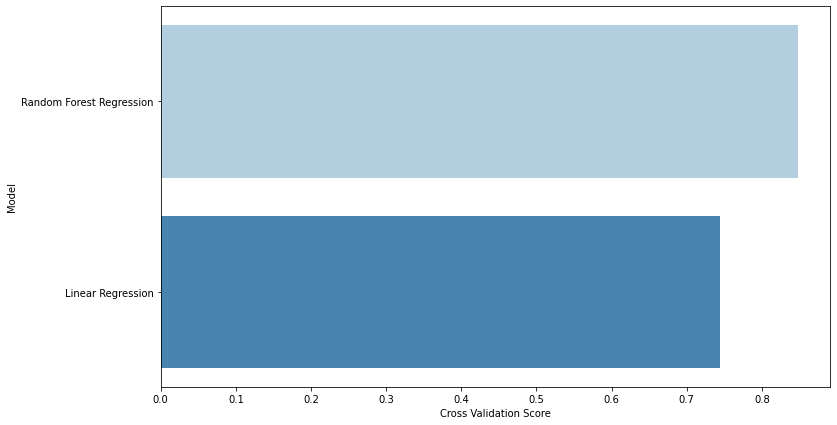

In [ ]:
# uyguladığımız regresyon modellerinin bir arada gösterilmesi
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Blues')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

random forest regression modeli daha başarılı bir modeldir

## **7. Modeli Değerlendirme**

**KNEIGHBORS REGRESSOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
Prediction1=knn.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, Prediction1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, Prediction1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, Prediction1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, Prediction1), 2)) 
print("R2 score =", round(sm.r2_score(y_test, Prediction1), 2))

Mean absolute error = 0.34
Mean squared error = 0.33
Median absolute error = 0.13
Explain variance score = 0.69
R2 score = 0.69


**RANDOM FORESTREGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
prediction2 = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction2), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction2), 2))

Mean absolute error = 0.2
Mean squared error = 0.14
Median absolute error = 0.08
Explain variance score = 0.87
R2 score = 0.87


**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
lnr= LinearRegression()
lnr.fit(X_train,y_train)
prediction3= lnr.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction3), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction3), 2))

Mean absolute error = 0.35
Mean squared error = 0.23
Median absolute error = 0.22
Explain variance score = 0.78
R2 score = 0.78
